### Looking at Pittsburgh Lead Concentrations per School District - Jacob

### Introduction

Lead poisoning is known to the cause of many diseases and the concept of this notebook is to look at which school districts have the least amount of lead concentrations in their water with the lead concentration percent as a metric to calculate the best and worst. 

#### Mimimal look at the raw data provided from the WPRDC database

In [2]:
import pandas as pd
import geopandas
import descartes
%matplotlib inline
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt

In [3]:
# import dataset
data = pd.read_csv("wprdc_schooldistrict_ebll15_20.csv")
data.head()

,SchoolDistrict,percentEBLL2015,note2015,percentEBLL2016,note2016,percentEBLL2017,note2017,percentEBLL2018,note2018,percentEBLL2019,note2019,percent2020,note2020,percentEBLL15_20,note15_19
0,Allegheny Valley,0.00,"Unstable percent, interpret with caution",0.00,"Unstable percent, interpret with caution",0.92,"Unstable percent, interpret with caution",0.68,"Unstable percent, interpret with caution",0.00,"Unstable percent, interpret with caution",1.30,"Unstable percent, interpret with caution",0.58,"Unstable percent, interpret with caution"
1,Avonworth,0.72,"Unstable percent, interpret with caution",0.75,"Unstable percent, interpret with caution",0.55,"Unstable percent, interpret with caution",0.89,"Unstable percent, interpret with caution",2.00,"Unstable percent, interpret with caution",0.56,"Unstable percent, interpret with caution",1.02,NaN
2,Baldwin-Whitehall,0.91,"Unstable percent, interpret with caution",0.59,"Unstable percent, interpret with caution",1.40,NaN,1.42,NaN,0.49,"Unstable percent, interpret with caution",0.19,"Unstable percent, interpret with caution",0.98,NaN
3,Bethel Park,0.00,"Unstable percent, interpret with caution",0.00,"Unstable percent, interpret with caution",0.61,"Unstable percent, interpret with caution",0.18,"Unstable percent, interpret with caution",0.89,"Unstable percent, interpret with caution",0.00,"Unstable percent, interpret with caution",0.44,"Unstable percent, interpret with caution"
4,Brentwood Borough,1.60,"Unstable percent, interpret with caution",1.35,"Unstable percent, interpret with caution",3.45,"Unstable percent, interpret with caution",2.68,"Unstable percent, interpret with caution",2.54,"Unstable percent, interpret with caution",2.31,"Unstable percent, interpret with caution",2.47,NaN


From the preview above, it can be seen that lead levels in the water increase by the year.

#### Reading in the Shape file and preview of shape file

,OBJECTID,SCHOOLD,School_Dis,S_District,SchoolDist,note15_19,Pct15_19,geometry
0,1,Allegheny Valley,Allegheny Valley,Allegheny Valley,Allegheny Valley,"Unstable percent, interpret with caution",0.43,"POLYGON ((-79.81144 40.56654, -79.81130 40.561..."
1,2,Avonworth,Avonworth,Avonworth,Avonworth,None,1.15,"POLYGON ((-80.10916 40.57232, -80.10429 40.569..."
2,3,Baldwin-Whitehall,Baldwin-Whitehall,Baldwin-Whitehall,Baldwin-Whitehall,None,1.05,"MULTIPOLYGON (((-80.01709 40.38632, -80.01640 ..."
3,4,Bethel Park,Bethel Park,Bethel Park,Bethel Park,"Unstable percent, interpret with caution",0.51,"POLYGON ((-80.03796 40.28903, -80.04146 40.290..."
4,5,Brentwood Borough,Brentwood Borough,Brentwood Borough,Brentwood Borough,None,2.46,"POLYGON ((-79.96448 40.36971, -79.96455 40.369..."


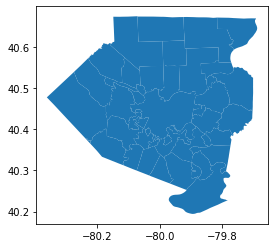

In [4]:
maps = geopandas.read_file("Data/EBLL_SD15_19.shp") # read in the shapefile
maps.plot() # plot the geopandas dataframe
maps.head()

Preview of the boundaries covered by the data set above

#### Preview graph of raw data

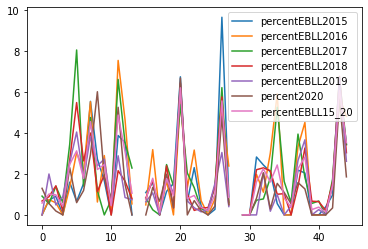

In [5]:
data.plot()

#### Checking the reliability of the data as some are Censored/NaNs

In [6]:
reliability = data[['note2015', 'note2016', 'note2017', 'note2018', 'note2019', 'note2020']]
reliability.count()


print ("Unrealiable values in the dataset")
print ('2015 2016 2017 2018 2019 2020')
for column in reliability:
    print((reliability[column]=='Censored').sum() +
          (reliability[column]=='NaN').sum(), end = "    ")
print("\nPercent reliability of the data: " + str(round(( (45 - 2) / 45 ) * 100, 2)) + "%")

Unrealiable values in the dataset
2015 2016 2017 2018 2019 2020
2    2    2    2    2    2    
Percent reliability of the data: 95.56%


#### Lead Concentration of all the years as a density probability chart

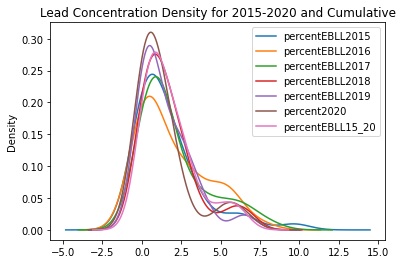

In [7]:
data.plot.density(title = "Lead Concentration Density for 2015-2020 and Cumulative")

As you can see from the 6 graphs above, the higher peaks mean that theres more concentration of lead. For example, in the above graph the two peaks are at ~1 and ~6. This mean most of the data values fall around ~1 and the some others fall around ~6. And so most of the lead concentration in water at each school district falls around ~1. 

#### Looking at how data is spread out over school districts for 2015 and 2020

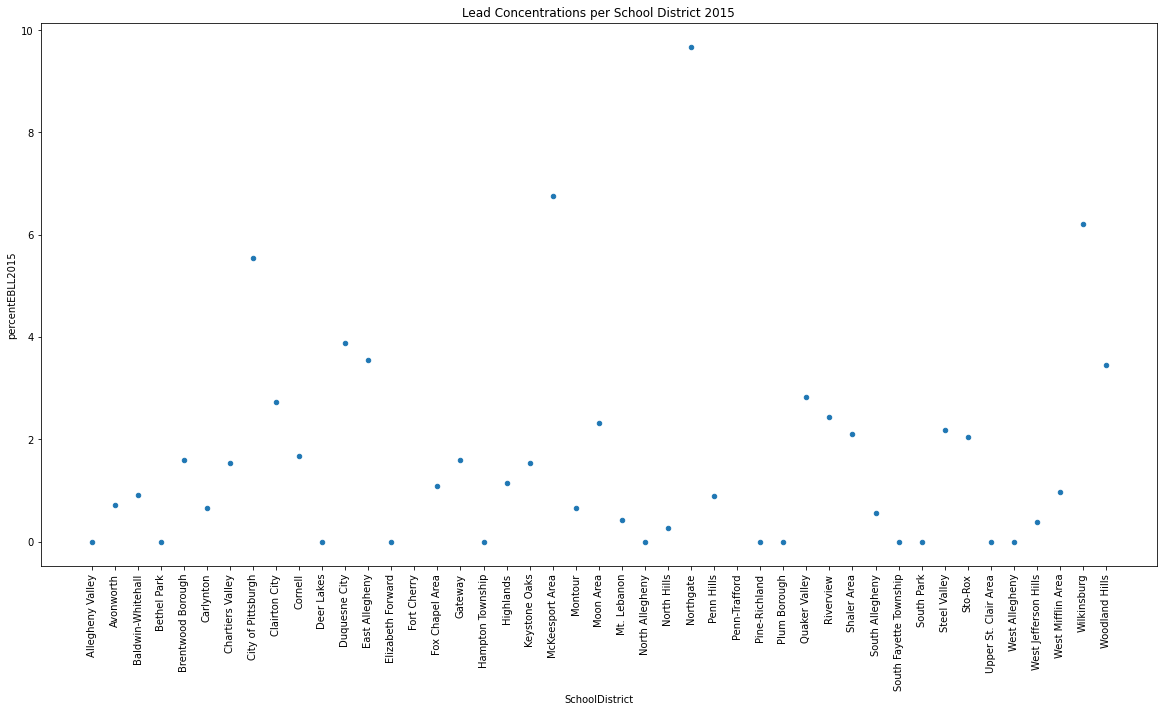

In [8]:
data.plot(kind = 'scatter', x = 'SchoolDistrict', y = 'percentEBLL2015', rot = 90, title = "Lead Concentrations per School District 2015", figsize=(20, 10) )

According to the scatter plot from 2015, the school district with the most amount of lead concentrations is Northgate School District

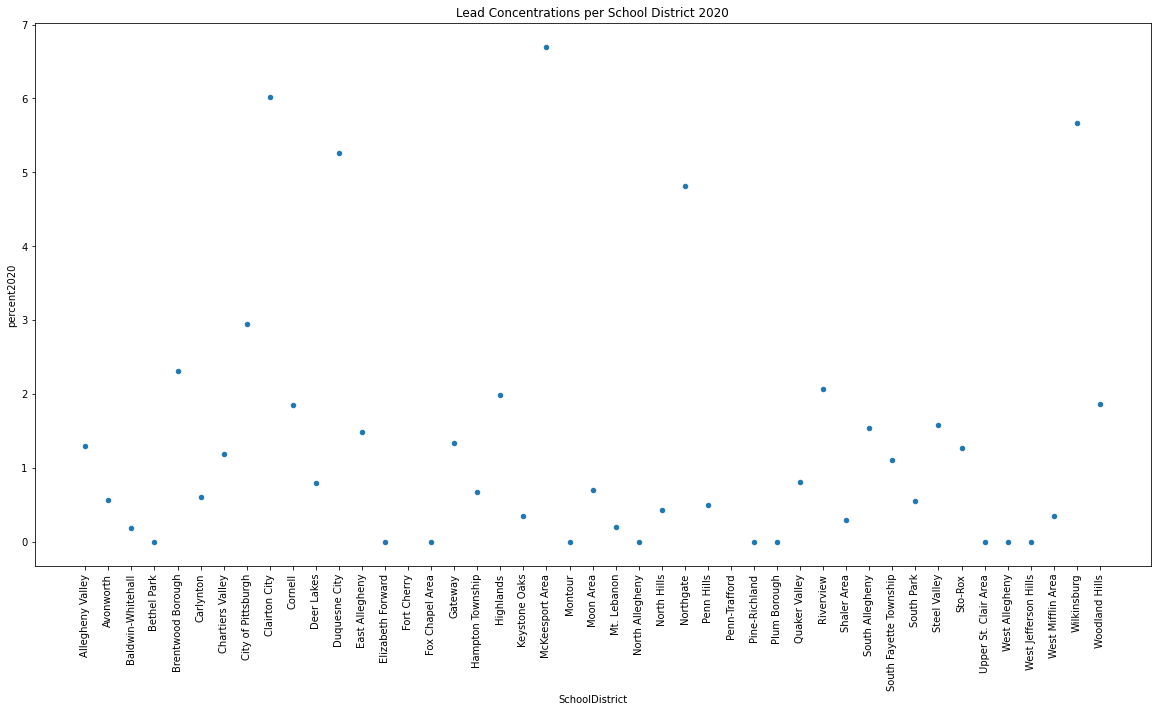

In [9]:
data.plot(kind = 'scatter', x = 'SchoolDistrict', y = 'percent2020', rot = 90, title = "Lead Concentrations per School District 2020", figsize=(20, 10) )

But according to the 2020 lead concentration scatter plot, McKeesport Area School District is the area with the highest amount of lead concentrations. 

#### Simplifing Data

For the sake of simpilicity, only the most recent dataset (from 2020) will be referenced as it is more useful in finguring out the current best neighborhood. 

#### Previewing and Merging Map Data to 2020 Data Set

In [10]:
table_2020 = data[['SchoolDistrict', 'percent2020']]
maps_2020 = maps.merge(table_2020, how = 'left', 
                       left_on = 'SCHOOLD', right_on = 'SchoolDistrict')

In [11]:
maps_2020.head()

,OBJECTID,SCHOOLD,School_Dis,S_District,SchoolDist,note15_19,Pct15_19,geometry,SchoolDistrict,percent2020
0,1,Allegheny Valley,Allegheny Valley,Allegheny Valley,Allegheny Valley,"Unstable percent, interpret with caution",0.43,"POLYGON ((-79.81144 40.56654, -79.81130 40.561...",Allegheny Valley,1.30
1,2,Avonworth,Avonworth,Avonworth,Avonworth,None,1.15,"POLYGON ((-80.10916 40.57232, -80.10429 40.569...",Avonworth,0.56
2,3,Baldwin-Whitehall,Baldwin-Whitehall,Baldwin-Whitehall,Baldwin-Whitehall,None,1.05,"MULTIPOLYGON (((-80.01709 40.38632, -80.01640 ...",Baldwin-Whitehall,0.19
3,4,Bethel Park,Bethel Park,Bethel Park,Bethel Park,"Unstable percent, interpret with caution",0.51,"POLYGON ((-80.03796 40.28903, -80.04146 40.290...",Bethel Park,0.00
4,5,Brentwood Borough,Brentwood Borough,Brentwood Borough,Brentwood Borough,None,2.46,"POLYGON ((-79.96448 40.36971, -79.96455 40.369...",Brentwood Borough,2.31


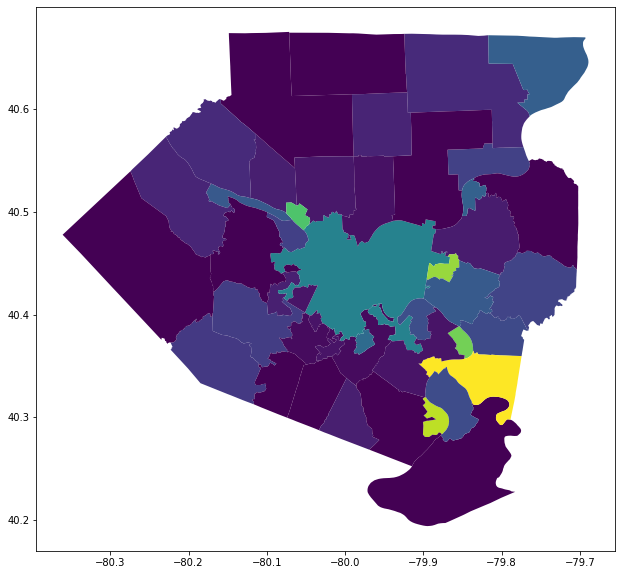

In [56]:
maps_2020.plot(column = 'percent2020', figsize=(20, 10) )

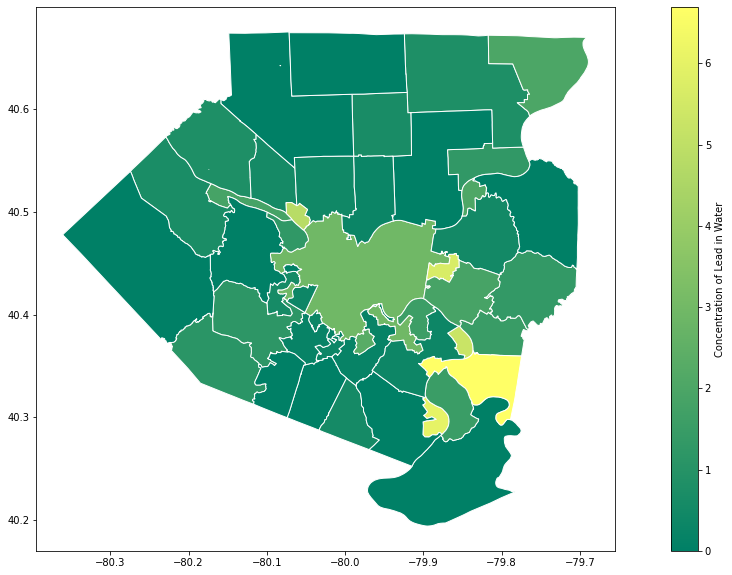

In [12]:
maps_2020.plot(column= 'percent2020',
               cmap= 'summer',          
               edgecolor="white",    
               legend=True,          
               legend_kwds={'label': "Concentration of Lead in Water"},
               figsize=(20, 10)      
               )

<ipython-input-13-631a2b530c22>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  maps_2020["center"] = maps_2020["geometry"].centroid


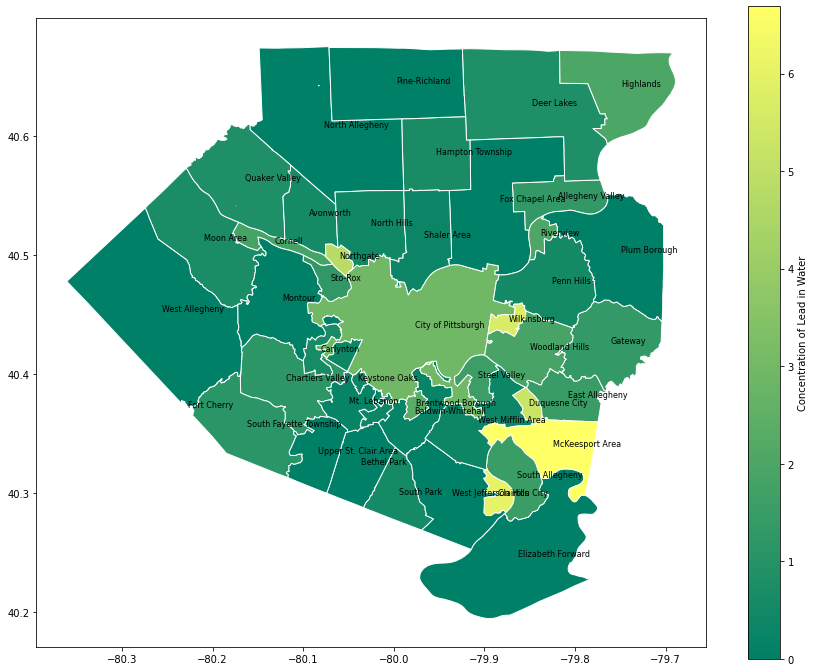

In [13]:
maps_2020["center"] = maps_2020["geometry"].centroid
maps_2020_points = maps_2020.copy()
maps_2020_points.set_geometry("center", inplace = True)
ax = maps_2020.plot(column= 'percent2020',
               cmap= 'summer',          
               edgecolor="white",    
               legend=True,          
               legend_kwds={'label': "Concentration of Lead in Water"},
               figsize=(15, 12) )
texts = []

for x, y, label in zip(maps_2020_points.geometry.x, maps_2020_points.geometry.y, maps_2020_points["SchoolDistrict"]):
    texts.append(plt.text(x, y, label, fontsize = 8))


The yellow school district is the district with the most amount of lead in water and that is McKeesport. 

The yellow school district is the district with the least amount of lead in water and currently unknown just by looking at colors. 

#### Calculating the worst school district with lead pollution

In [14]:
print(table_2020[table_2020.percent2020 == table_2020.percent2020.max()])

     SchoolDistrict  percent2020
20  McKeesport Area         6.69


#### Calculating the best school district without too much lead pollution

In [36]:
print(table_2020[table_2020.percent2020 == table_2020.percent2020.min()])

          SchoolDistrict  percent2020
3            Bethel Park          0.0
13     Elizabeth Forward          0.0
15       Fox Chapel Area          0.0
21               Montour          0.0
24       North Allegheny          0.0
29         Pine-Richland          0.0
30          Plum Borough          0.0
39  Upper St. Clair Area          0.0
40        West Allegheny          0.0
41  West Jefferson Hills          0.0


#### Printing out the rank of each school district

In [19]:
table_2020['Neighborhood'] = {
    'Elizabeth': 'Elizabeth Forward',
    'Bethel Park': 'Bethel Park',
    'Franklin Park': 'North Allegheny',
    'Jefferson Hills': 'West Jefferson Hills',
    'Imperial': 'West Allegheny',
    'Upper St. Clair': 'Upper St. Clair',
    'Plum': 'Plum Borough',
    'McKees Rocks': 'Montour',
    'Gibsonia': 'Pine-Richland',
    'Fox Chapel': 'Fox Chapel Area',
    'Baldwin, Whitehall': 'Baldwin-Whitehall',
    'Mt. Lebanon': 'Mt. Lebanon',
    'Etna': 'Shaler Area',
    'West Miffilin': 'West Mifflin Area',
    'Green Tree': 'Keyston Oaks',
    'North Hills': 'North Hills',
    'Penn Hills': 'Penn Hills',
    'South Park': 'South Park',
    'Ben Avon': 'Avonworth',
    'Carnegie': 'Carlynton',
    'Hampton': 'Hampton Township',
    'Moon': 'Moon Area',
    'Deer Lake': 'Deer Lakes',
    'Lettsdale': 'Quaker Valley',
    'MacDonald': 'South Fayette Township',
    'Bridgeville': 'Chartiers Valley',
    'Stowe': 'Sto-Rox',
    'Harwick': 'Allegheny Valley',
    'Monrowville': 'Gateway',
    'North Versailles': 'East Allegheny',
    'McKeesport': 'South Allegheny',
    'Munhall': 'Steel Valley',
    'Coraopolis': 'Cornell',
    'Forest Hill': 'Woodland Hills',
    'Natrona Heights': 'Highlands',
    'Oakmont': 'Riverview',
    'Brentwood': 'Brentwood Borough',
    'Oakland, South Side': 'City of Pittsburgh',
    'Bellevue': 'Northgate',
    'Duquesne': 'Duquesne City',
    'Wilkinsburgh': 'Wilkinsburg',
    'Clairton': 'Clairton City',
    'McKeesports': 'McKeesport Area',
    'McDonald': 'Fort Cherry',
    'Trafford': 'Penn-Trafford'
}
table_2020.sort_values(by='percent2020')

,SchoolDistrict,percent2020,Neighborhood
13,Elizabeth Forward,0.00,West Miffilin
3,Bethel Park,0.00,Jefferson Hills
24,North Allegheny,0.00,MacDonald
41,West Jefferson Hills,0.00,Clairton
40,West Allegheny,0.00,Wilkinsburgh
39,Upper St. Clair Area,0.00,Duquesne
30,Plum Borough,0.00,McKeesport
21,Montour,0.00,Moon
29,Pine-Richland,0.00,North Versailles
15,Fox Chapel Area,0.00,North Hills


### Conclusion

The dataset provided was in terms of school districts so I had to use a shape file and plot in term of school districts. That being said, it will be easy to translate school districts to neighborhoods due to their similarity. So far, the list above is useful in figuring out the school distris with the least of lead concentration. The one thing that surprised me the most was amount of lead concentration in McKeesport in 2020 because it is surrounded by districts with significantly less concentrations. 